This notebook generates an empirical histogram of the maximum (extreme) value taken from a number of samples of an Exponential distribution and compares the results to an exact calculation of the distribution and to the limiting case ensured by the [Fisher–Tippett–Gnedenko theorem](https://en.wikipedia.org/wiki/Fisher%E2%80%93Tippett%E2%80%93Gnedenko_theorem).

A fuller explanation of this example is given in [this](https://www.youtube.com/watch?v=6KvQPHdZuoU&list=PLIwqi3x7Lu0oR2jJaCs8kIXaxba5Cq5sG&index=5) lecture.

In [1]:
using Distributions, Plots, ForwardDiff

In [2]:
λ=20 # Parameter of the Exponential distribution we are using as the source of the samples
ρ = Exponential(λ)

N = 8 # The number of samples from which the maximum is taken
T = 100000 # The number of trials over which to make the histogram

pev = [maximum(rand(ρ, N)) for i in 1:T]; # Generated array of extreme values

For the Exponential distribution the limiting distibution of the extreme value is the [Gumbel distribution](https://en.wikipedia.org/wiki/Gumbel_distribution) with parameters $\mu = \lambda ln(n)$ and $\beta=\lambda$. A simple derivation is given in the lecture mentioned above.

In [3]:
gumbel(μ,β) = (x) -> begin 
    z=(x-μ)/β
    exp(-(z+exp(-z)))/β
end

gumbel (generic function with 1 method)

We can also define the exact distribution function (also show in the above lecture). Its CDF is simply the "[survival function](https://en.wikipedia.org/wiki/Survival_function)" of the source distribution raised to the number of samples. We obtain the PDF by diferentiating.

In [4]:
exact(x) = ForwardDiff.derivative(x -> (1-exp(-x/λ))^N, x)

exact (generic function with 1 method)

Plotting the results we can see the exact distribution is indeed correct and the Gumbel approximates it as $N\to\infty$. It seems that as N increases the distribution widens very slightly on the lower side rather than in the right tail.

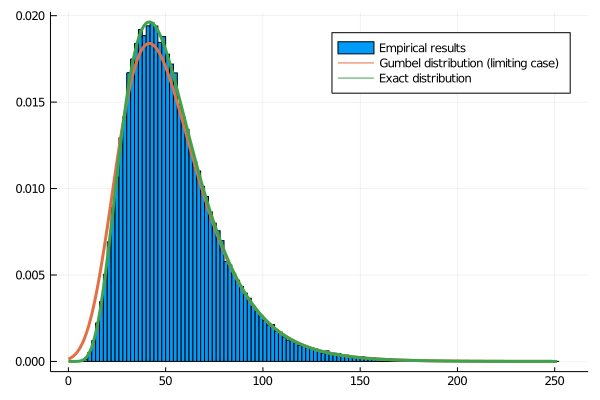

In [5]:
histogram(pev, normed=true, label="Empirical results")
plot!(0:0.1:maximum(pev), gumbel(log(N)*λ, λ), lw=3, label="Gumbel distribution (limiting case)")
plot!(0:0.1:maximum(pev), exact, lw=3, label="Exact distribution")